# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
import os
os.chdir("/Users/Tom Stark/Desktop/Weather-API-Instructions/starter_code")
os.getcwd()

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt

# Import API key
# from api_keys import weather_api_key
weather_api_key = "70d19cb740f10c57771436592fec118a"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities = cities[0:520]
responses = []

setlength = 49
citysets = [cities[i:i + setlength] for i in range(0, len(cities), setlength)]
# citysets = citysets[0:1]

print("Beginning Data Retrieval ")
print("-----------------------------")

setcount = 1
for csets in citysets:
    
    # Loop Through List of Cities & Perform a Request for Data on Each
    recordcount = 1
    for city in csets:
        try:
            citydict = {}
            response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={city}").json()

            citydict["city_name"] = response["name"]
            citydict["country"] = response["sys"]["country"]
            citydict["date"] = response["dt"]
            citydict["lat"] = response["coord"]["lat"]
            citydict["long"] = response["coord"]["lon"]
            citydict["max_temp"] = response["main"]["temp_max"]
            citydict["humidity"] = response["main"]["humidity"]
            citydict["cloudiness"] = response["clouds"]["all"]
            citydict["wind_speed"] = response["wind"]["speed"]

            responses.append(citydict)
            print(f"Processing Record {recordcount} of Set {setcount} | {city}")
            recordcount += 1 
            
        except:
            print(f"{city} not found. Skipping...")
        time.sleep(1)
            
    setcount += 1
    

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | marystown
Processing Record 2 of Set 1 | punta arenas
attawapiskat not found. Skipping...
chagda not found. Skipping...
Processing Record 3 of Set 1 | bosaso
Processing Record 4 of Set 1 | quelimane
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | maldonado
Processing Record 8 of Set 1 | srednekolymsk
Processing Record 9 of Set 1 | cochrane
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | san mariano
Processing Record 14 of Set 1 | southbridge
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | constitucion
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | upernavik
el badari not found. Skipping...
grand river south east not found. Skipping...
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weatherDF = pd.DataFrame(responses)
weatherDF.count()

city_name     456
country       456
date          456
lat           456
long          456
max_temp      456
humidity      456
cloudiness    456
wind_speed    456
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weatherDF
# weatherDF.describe()

,city_name,country,date,lat,long,max_temp,humidity,cloudiness,wind_speed
0,Marystown,CA,1590112748,47.17,-55.15,44.58,74,100,18.14
1,Punta Arenas,CL,1590112749,-53.15,-70.92,41.00,80,75,11.41
2,Bosaso,SO,1590112752,11.28,49.18,90.00,50,0,8.93
3,Quelimane,MZ,1590112753,-17.88,36.89,64.40,93,20,3.36
4,Bredasdorp,ZA,1590112754,-34.53,20.04,53.60,81,20,3.36
...,...,...,...,...,...,...,...,...,...
451,Fort Saint James,CA,1590113262,54.43,-124.25,56.34,59,100,6.73
452,Lugovaya,RU,1590113263,56.05,37.48,41.00,93,75,6.71
453,Caravelas,BR,1590113264,-17.71,-39.25,72.43,91,30,5.50
454,Fowa,NG,1590113265,8.92,6.40,76.33,91,100,3.71


In [7]:
#  Get the indices of cities that have humidity over 100%.
humidityindex = weatherDF[weatherDF['humidity'] > 100].index

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weatherDF.drop(humidityindex, inplace=False)

In [9]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
weatherDF.to_csv("city_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

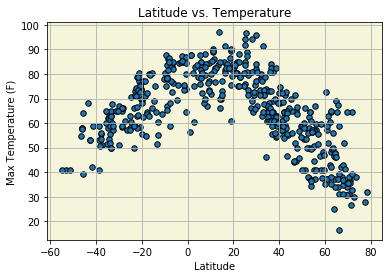

In [10]:
weatherDF.plot.scatter(x='lat', y='max_temp', s=30, edgecolors='black')
plt.grid()
plt.title("Latitude vs. Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
ax = plt.gca()
ax.set_facecolor('#f5f5dc')
plt.show()
# plt.savefig("latvTmp.png")

## Latitude vs. Humidity Plot

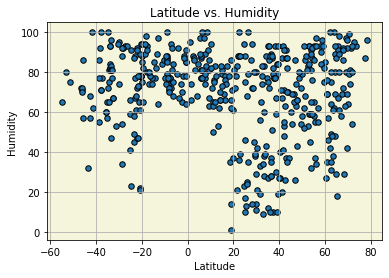

In [11]:
weatherDF.plot.scatter(x='lat', y='humidity', s=30, edgecolors='black')
plt.grid()
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
ax = plt.gca()
ax.set_facecolor('#f5f5dc')
plt.show()

# plt.savefig("latvHum.png")

## Latitude vs. Cloudiness Plot

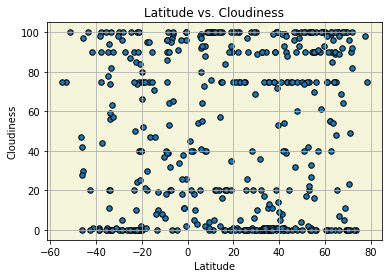

In [12]:
weatherDF.plot.scatter(x='lat', y='cloudiness', s=30, edgecolors='black')
plt.grid()
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
ax = plt.gca()
ax.set_facecolor('#f5f5dc')
plt.show()

# plt.savefig("latvCloud.png")

## Latitude vs. Wind Speed Plot

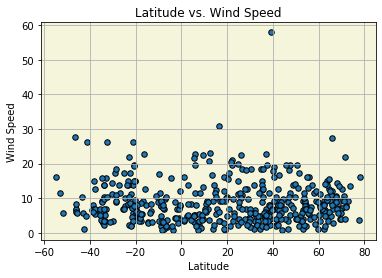

In [13]:
weatherDF.plot.scatter(x='lat', y='wind_speed', s=30, edgecolors='black')
plt.grid()
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
ax = plt.gca()
ax.set_facecolor('#f5f5dc')
plt.show()

# plt.savefig("latvWind.png")

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg_plot(dataframe, xvalues, yvalues, xtitle, ytitle, anno_placement):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(dataframe[xvalues], dataframe[yvalues])
    regress_values = dataframe[xvalues] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    dataframe.plot.scatter(x=xvalues, y=yvalues, s=30, edgecolors='black')
    plt.plot(dataframe[xvalues],regress_values,"r")
    plt.annotate(line_eq, anno_placement, fontsize=15, color="red")
    plt.grid()
    plt.title(f"{xtitle} vs. {ytitle} ({dt.datetime.now().strftime('%Y/%m/%d')})")
    plt.ylabel(f"{ytitle}")
    plt.xlabel(f"{xtitle}")
    ax = plt.gca()
    ax.set_facecolor('#f5f5dc')
    print(f"The r-squared is: {rvalue}")
    plt.show()
    

In [22]:
# Create Northern and Southern Hemisphere DataFrames
norhemDF = weatherDF.loc[weatherDF['lat'] > 0]
souhemDF = weatherDF.loc[weatherDF['lat'] < 0]
# souhemDF.describe()
souhemDF

,city_name,country,date,lat,long,max_temp,humidity,cloudiness,wind_speed
1,Punta Arenas,CL,1590112749,-53.15,-70.92,41.00,80,75,11.41
3,Quelimane,MZ,1590112753,-17.88,36.89,64.40,93,20,3.36
4,Bredasdorp,ZA,1590112754,-34.53,20.04,53.60,81,20,3.36
5,Hermanus,ZA,1590112755,-34.42,19.23,60.12,75,11,2.89
6,Departamento de Maldonado,UY,1590112756,-34.67,-54.92,62.01,100,90,9.17
...,...,...,...,...,...,...,...,...,...
444,Bella Union,UY,1590113254,-30.28,-57.60,64.83,94,98,14.43
448,Nelson Bay,AU,1590113259,-32.72,152.15,59.00,67,90,26.40
449,Seddon,AU,1590113260,-37.81,144.89,55.99,71,75,12.75
453,Caravelas,BR,1590113264,-17.71,-39.25,72.43,91,30,5.50


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8189185584293707


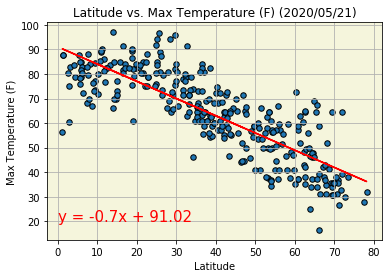

In [23]:
lin_reg_plot(norhemDF, 'lat', 'max_temp', 'Latitude', 'Max Temperature (F)', (0,20))
# plt.savefig("latvTmpNH.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7648303116190563


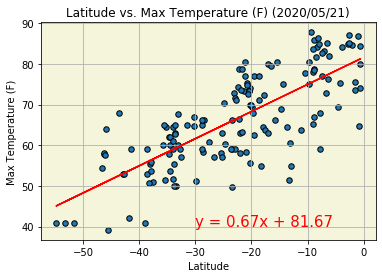

In [33]:
lin_reg_plot(souhemDF, 'lat', 'max_temp', 'Latitude', 'Max Temperature (F)', (-30,40))
# plt.savefig("LatvTmpSH.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02436530456006782


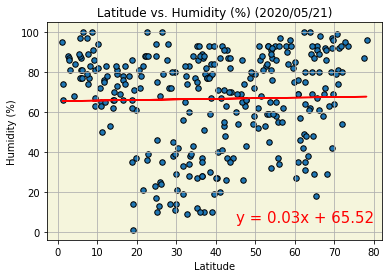

In [25]:
lin_reg_plot(norhemDF, 'lat', 'humidity', 'Latitude', 'Humidity (%)', (45,5))
# plt.savefig("LatvHumNH.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17094850438788872


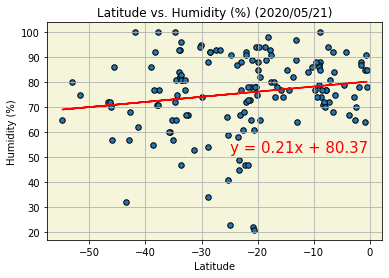

In [34]:
lin_reg_plot(souhemDF, 'lat', 'humidity', 'Latitude', 'Humidity (%)', (-25,52))
# plt.savefig("LatvHumSH.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1229580521887671


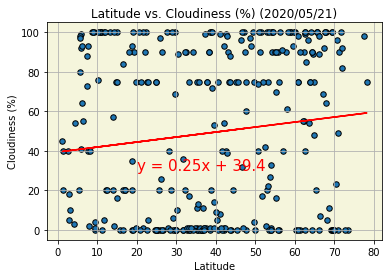

In [27]:
lin_reg_plot(norhemDF, 'lat', 'cloudiness', 'Latitude', 'Cloudiness (%)', (20,30))
# plt.savefig("LatvCloudNH.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03964954614774494


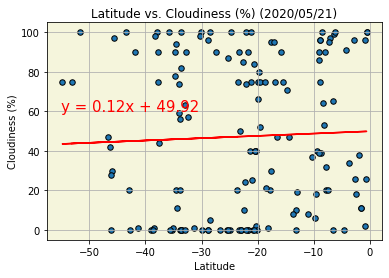

In [28]:
lin_reg_plot(souhemDF, 'lat', 'cloudiness', 'Latitude', 'Cloudiness (%)', (-55,60))
# plt.savefig("LatvCloudSH.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.007092388231431586


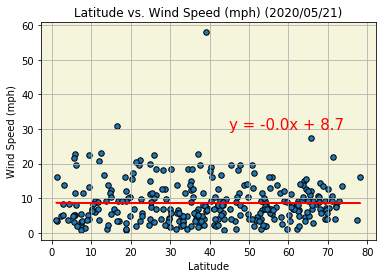

In [29]:
lin_reg_plot(norhemDF, 'lat', 'wind_speed', 'Latitude', 'Wind Speed (mph)', (45,30))
# plt.savefig("LatvWindNH.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.21774261992210875


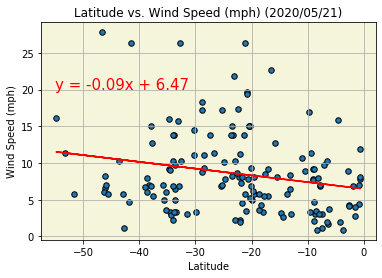

In [32]:
lin_reg_plot(souhemDF, 'lat', 'wind_speed', 'Latitude', 'Wind Speed (mph)', (-55,20))
# plt.savefig("LatvWindSH.png")

Data Observations:
1. Max temp is higher near the equator.
2. There are more places in the northern hemisphere that have lower humidity at this point in the year.
3. There doesn't seem to be an observable trend related to cloudiness and latitude.
